#Problem Statement:

***Japan Used Cars Price Prediction***

 Data on cars, including details about the biggest online marketplace for used cars in Japan, was scraped from tc-v.com. For every car in the dataset, ten features were compiled.  Estimate the cost of an unidentified vehicle.

 • This dataset includes 10 features:





---
  

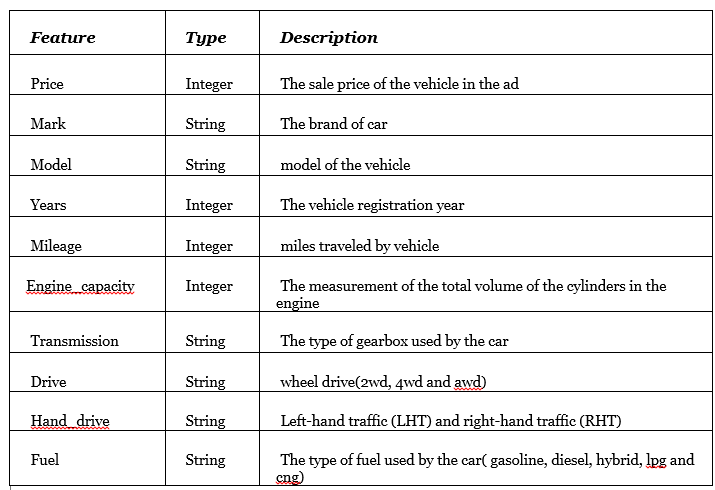











# Load the Data

In [ ]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,  Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [ ]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/Japan_used_cars_datasets.csv')

In [ ]:
# Dispay the data
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


# Exploring the data

In [ ]:
#Checking the shape of the data
df.shape

(2318, 11)

In [ ]:
# Summary of the dataset
df.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


In [ ]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


In [ ]:
# Checking for missing values
df.isnull().sum()

,0
id,0
price,0
mark,0
model,0
year,0
mileage,0
engine_capacity,0
transmission,0
drive,0
hand_drive,0


#Modifying the data

Since thier is no null values we will just drop the unwanted col and add some new features

In [ ]:
# Remove the 'id' column as it's not relevant for analysis
df = df.drop('id', axis=1)


In [ ]:
# Create new features

# 1. Age of the Car
current_year = 2024  # Assuming the current year is 2024
df['car_age'] = current_year - df['year']

# 2. Mileage per Year
df['mileage_per_year'] = df['mileage'] / df['car_age']

# 4. High Mileage Indicator
high_mileage_threshold = 100000  # Assuming 100,000 as the threshold for high mileage
df['high_mileage'] = (df['mileage'] > high_mileage_threshold).astype(int)

In [ ]:
# Display the updated DataFrame with new features
df.head()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,car_age,mileage_per_year,high_mileage
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline,21,3809.523810,0
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline,14,3785.714286,0
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline,19,2510.000000,0
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline,16,8166.312500,1
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline,18,3683.333333,0


# 1. UNIVARIATE ANALYSIS

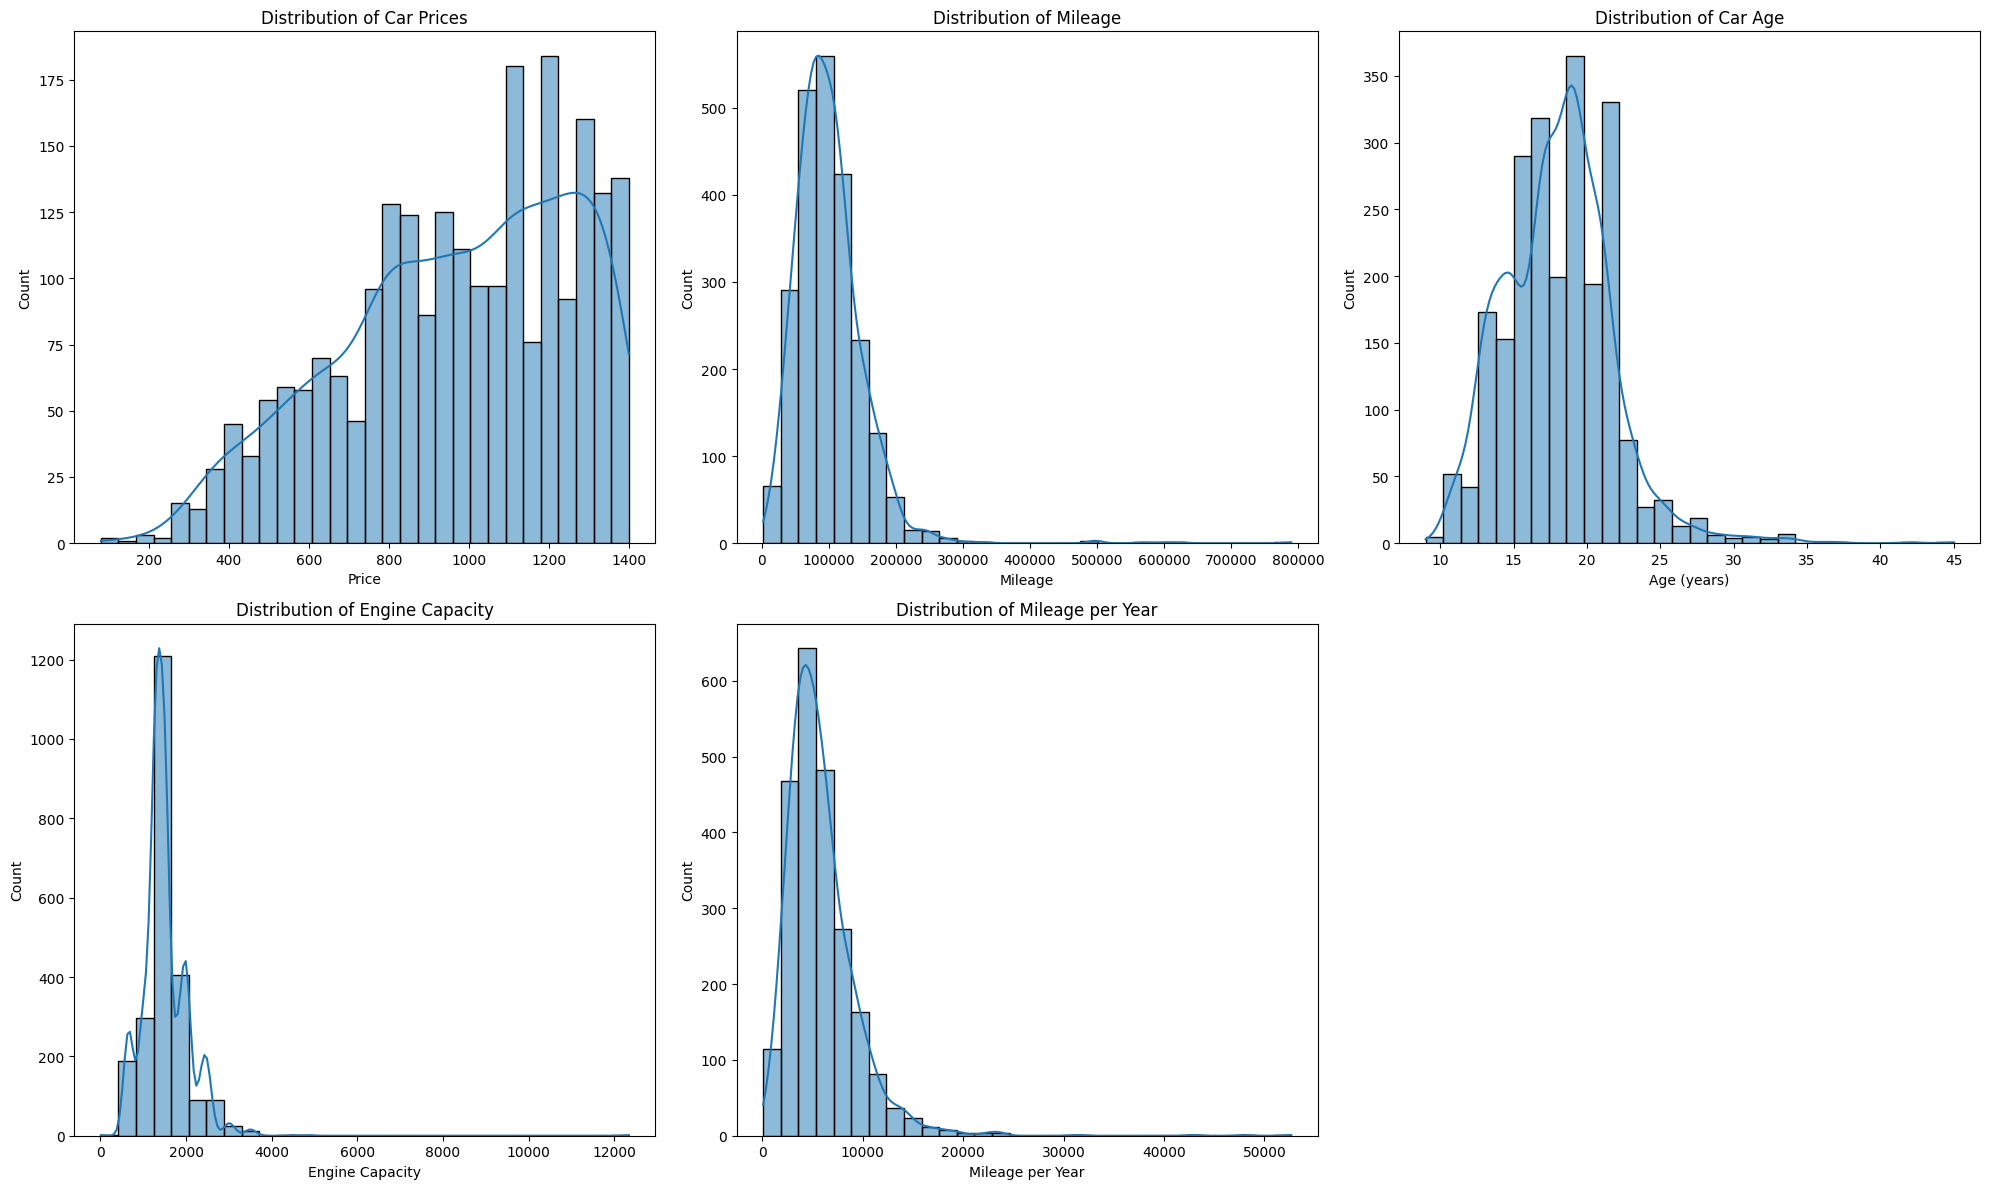

In [ ]:
fig = plt.figure(figsize=(20, 12))

# Price Distribution
plt.subplot(2, 3, 1)
sns.histplot(data=df, x='price', bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')


# Mileage Distribution
plt.subplot(2, 3, 2)
sns.histplot(data=df, x='mileage', bins=30, kde=True)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')

# Car Age Distribution
plt.subplot(2, 3, 3)
sns.histplot(data=df, x='car_age', bins=30, kde=True)
plt.title('Distribution of Car Age')
plt.xlabel('Age (years)')

# Engine Capacity Distribution
plt.subplot(2, 3, 4)
sns.histplot(data=df, x='engine_capacity', bins=30, kde=True)
plt.title('Distribution of Engine Capacity')
plt.xlabel('Engine Capacity')

# Mileage per Year Distribution
plt.subplot(2, 3, 5)
sns.histplot(data=df, x='mileage_per_year', bins=30, kde=True)
plt.title('Distribution of Mileage per Year')
plt.xlabel('Mileage per Year')

plt.tight_layout()
plt.show()




1. Distribution of Car Prices: The distribution is skewed right, meaning most cars are priced lower, and there are fewer very expensive cars.


2. Distribution of Mileage: Also skewed right, with a peak around 100,000 miles. This suggests a large number of cars have moderate mileage.


3. Distribution of Car Age: This is also skewed right, but with a broader peak. It suggests the dataset has a mix of older and newer cars, with a concentration around 15-20 years old.


4. Distribution of Engine Capacity: This distribution shows two distinct peaks: one around 1500cc and another at 2000cc. This may indicate common engine sizes for the cars in the dataset.


5. Distribution of Mileage per Year: This distribution, skewed right with a peak around 10,000 miles per year, suggests that some cars might have traveled a lot in a year, while most cars have accumulated mileage at a more moderate pace.

# 2. BIVARIATE ANALYSIS

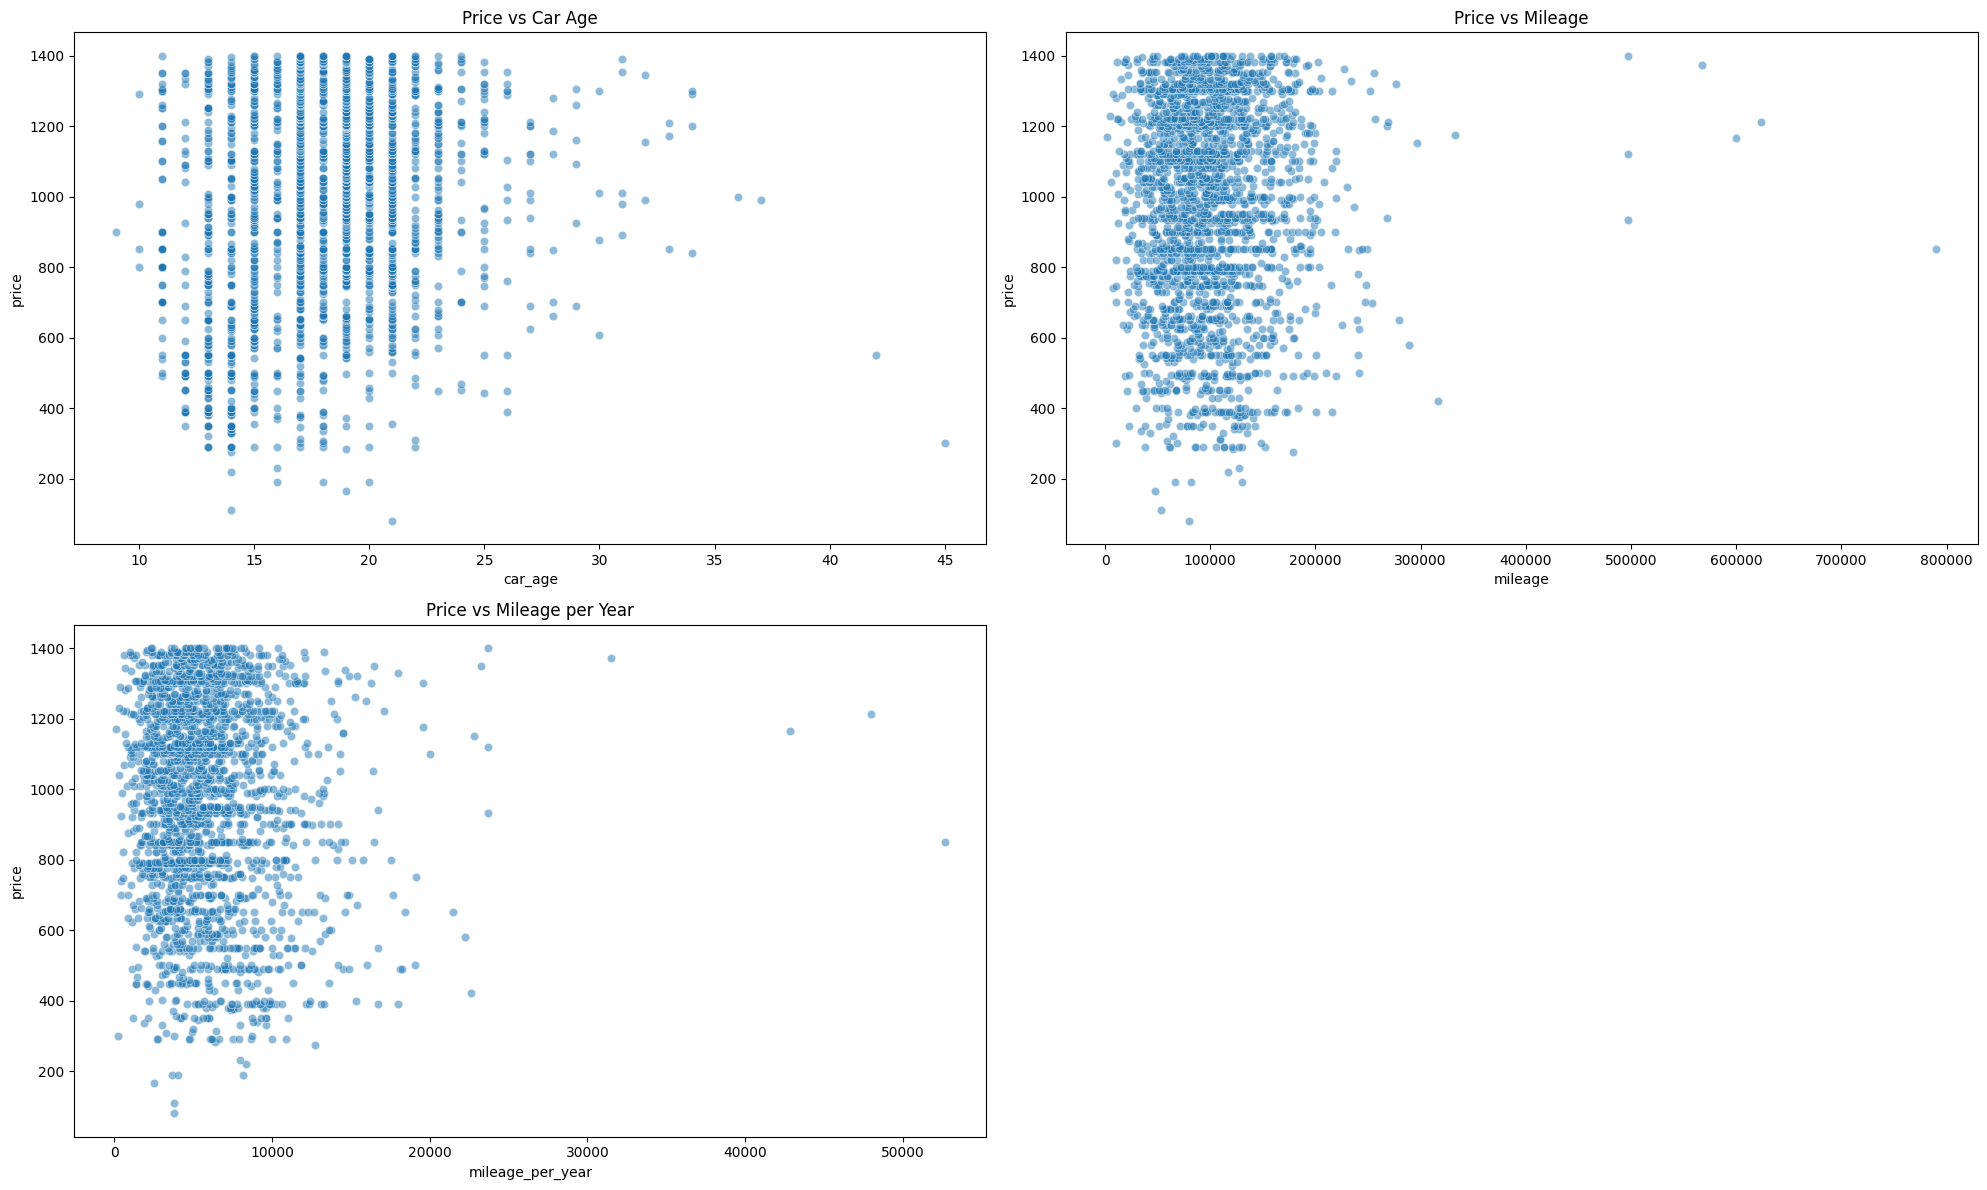

In [ ]:
plt.figure(figsize=(20, 12))

# Price vs Car Age
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='car_age', y='price', alpha=0.5)
plt.title('Price vs Car Age')

# Price vs Mileage
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='mileage', y='price', alpha=0.5)
plt.title('Price vs Mileage')

# Price vs Mileage per Year
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='mileage_per_year', y='price', alpha=0.5)
plt.title('Price vs Mileage per Year')

plt.tight_layout()
plt.show()

1. Price vs Car Age:  
The graph demonstrates that car prices decrease with age, but some older cars still fetch high prices due to factors like make, model, condition, and features.

2. Price vs Mileage:   
The graph shows a decreasing trend in car prices with increased mileage, indicating increased wear and tear. However, some high-mileage cars still fetch high prices due to factors like make, model, condition, and features.

3. Price vs Mileage per Year:  
The graph illustrates the correlation between a car's price and the average annual mileage driven. It suggests a decreasing trend as mileage increases, indicating wear and tear. However, some cars still fetch high prices due to factors like make, model, condition, and features.


The graphs reveal that car prices are influenced by factors like age, mileage, make, model, condition, and features, along with other factors like mileage per year.

# 3. MULTIVARIATE ANALYSIS

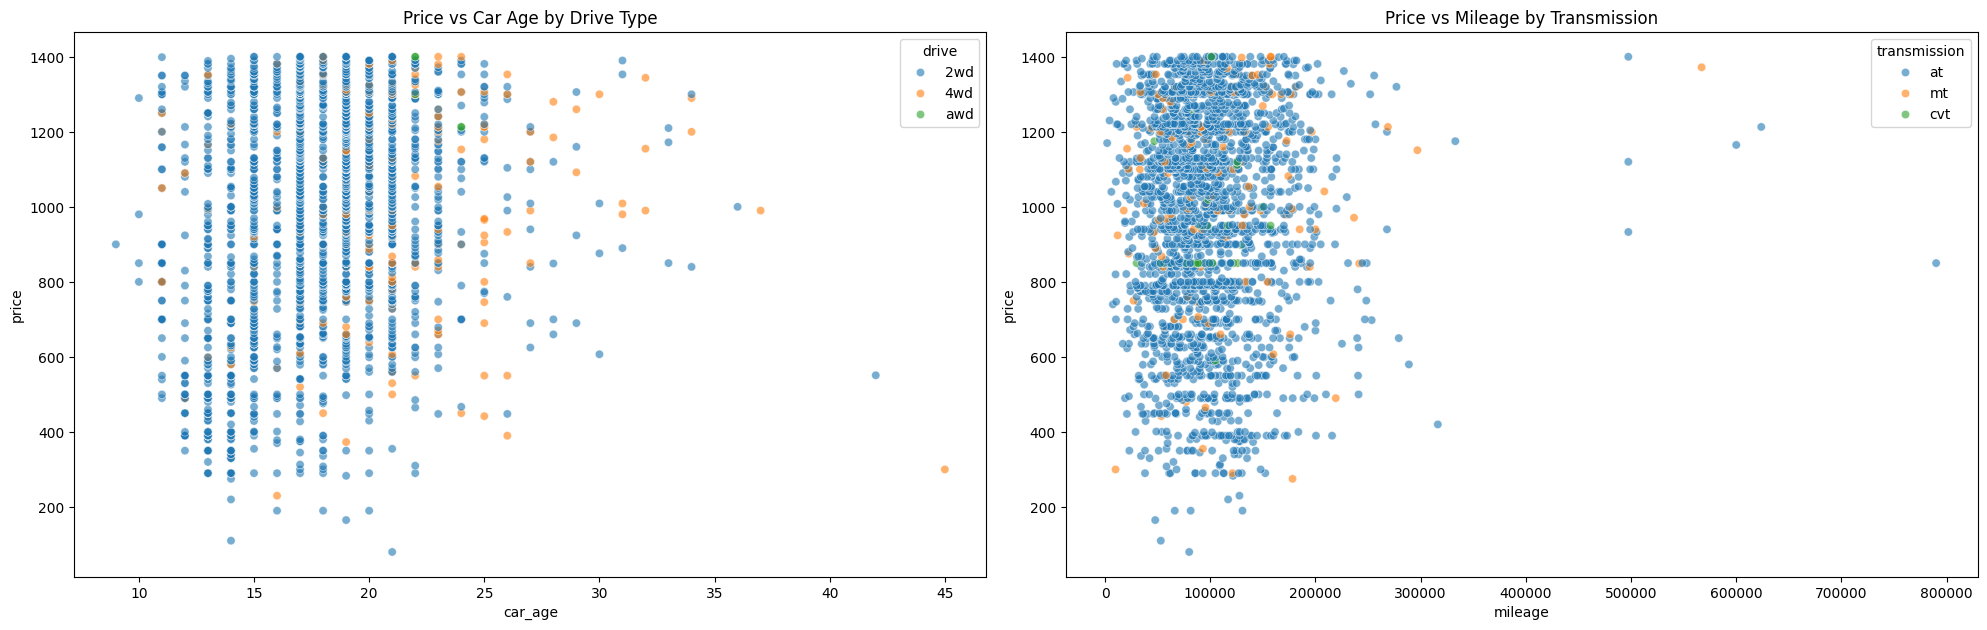

In [ ]:
plt.figure(figsize=(20, 12))

# Price vs Car Age by Drive Type
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='car_age', y='price', hue='drive', alpha=0.6)
plt.title('Price vs Car Age by Drive Type')

# Price vs Mileage by Transmission
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='mileage', y='price', hue='transmission', alpha=0.6)
plt.title('Price vs Mileage by Transmission')

plt.tight_layout()
plt.show()

1. Price vs Car Age by Drive Type:  
The graph reveals that car prices decrease with age, with 2WD cars being more expensive than 4WD and AWD cars, and 4WD cars being more expensive than AWD cars.


2. Price vs Mileage by Transmission:  
The graph reveals that as mileage increases, prices decrease due to increased wear and tear, and automatic transmission cars are generally more expensive than manual transmission cars.


Overall, these graphs suggest that car age and mileage are both important factors that affect car price. Other factors, such as drive type and transmission, can also play a role in determining the price of a car.





Text(0.5, 1.0, 'Correlation Heatmap')

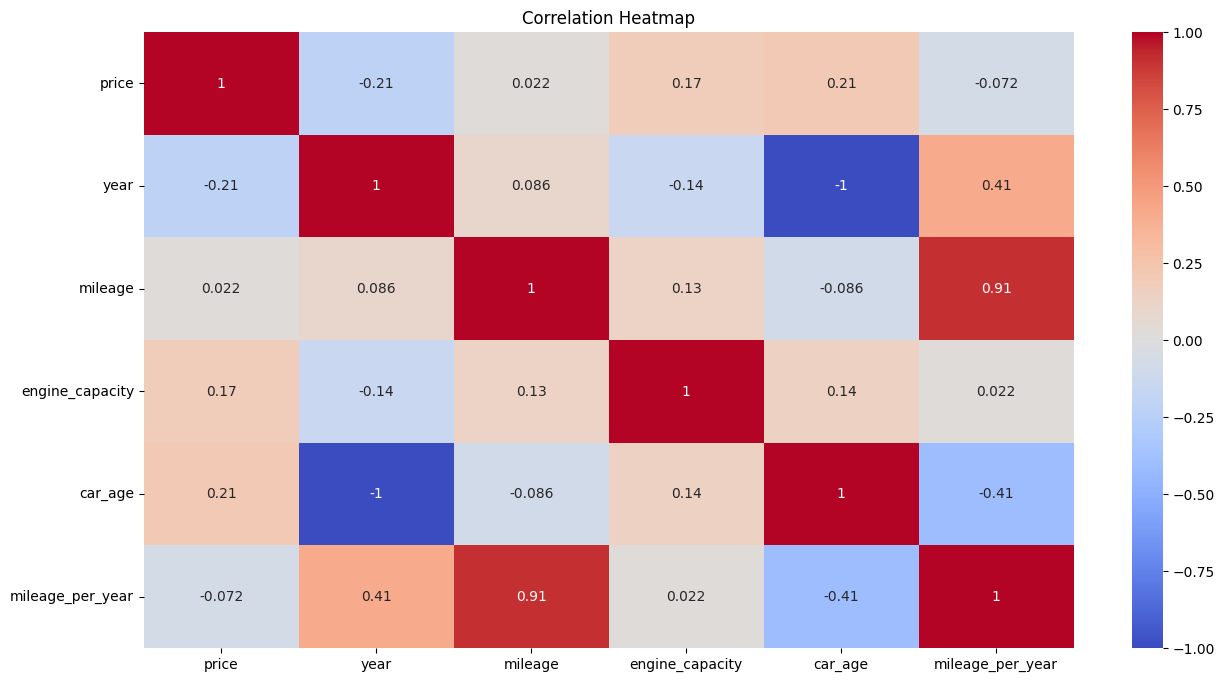

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(15, 8))
numerical_cols = ['price', 'year', 'mileage', 'engine_capacity', 'car_age', 'mileage_per_year']
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.yticks(rotation=360)
plt.title('Correlation Heatmap')

Correlation Analysis:  
The data shows a strong positive correlation between mileage per year and total mileage, indicating that cars with higher mileage per year tend to be older. Car age and year are also negatively correlated, indicating that older cars have accumulated more mileage. However, engine capacity and price show weak correlations, suggesting that these factors are not strongly dependent on a car's price.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'jaguar'),
  Text(1, 0, 'hino'),
  Text(2, 0, 'ford'),
  Text(3, 0, 'hyundai'),
  Text(4, 0, 'volvo'),
  Text(5, 0, 'kia motors'),
  Text(6, 0, 'bmw'),
  Text(7, 0, 'isuzu'),
  Text(8, 0, 'mitsuoka'),
  Text(9, 0, 'citroen')])

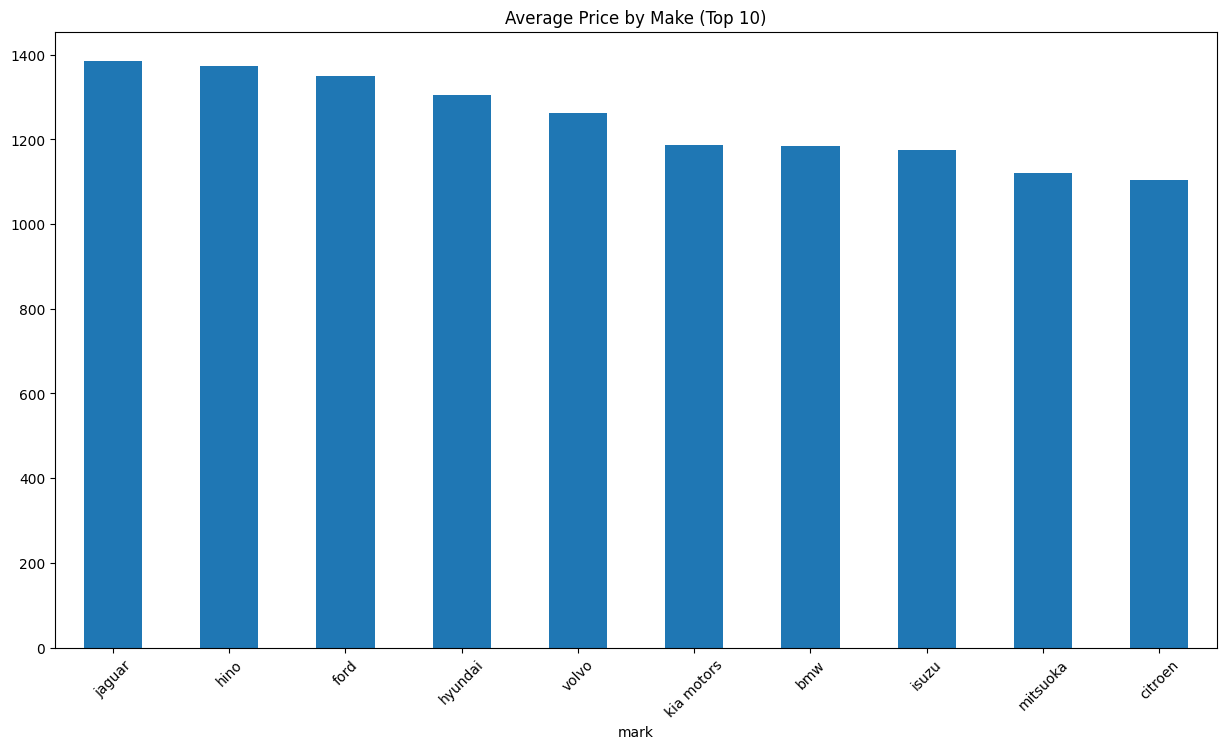

In [ ]:
# Average Price by Make (Top 10)
plt.figure(figsize=(15, 8))
avg_price_by_make = df.groupby('mark')['price'].mean().sort_values(ascending=False).head(10)
avg_price_by_make.plot(kind='bar')
plt.title('Average Price by Make (Top 10)')
plt.xticks(rotation=45)


Brand Analysis:  
This bar chart shows the average price of cars by make. The top 10 makes are: Jaguar, Hino, Ford, Hyundai, Volvo, Kia Motors, BMW, Isuzu, Mitsubishi, and Citroen. It looks like Jaguar cars are the most expensive, while Citroen cars are the least expensive.

# Check for Outliers

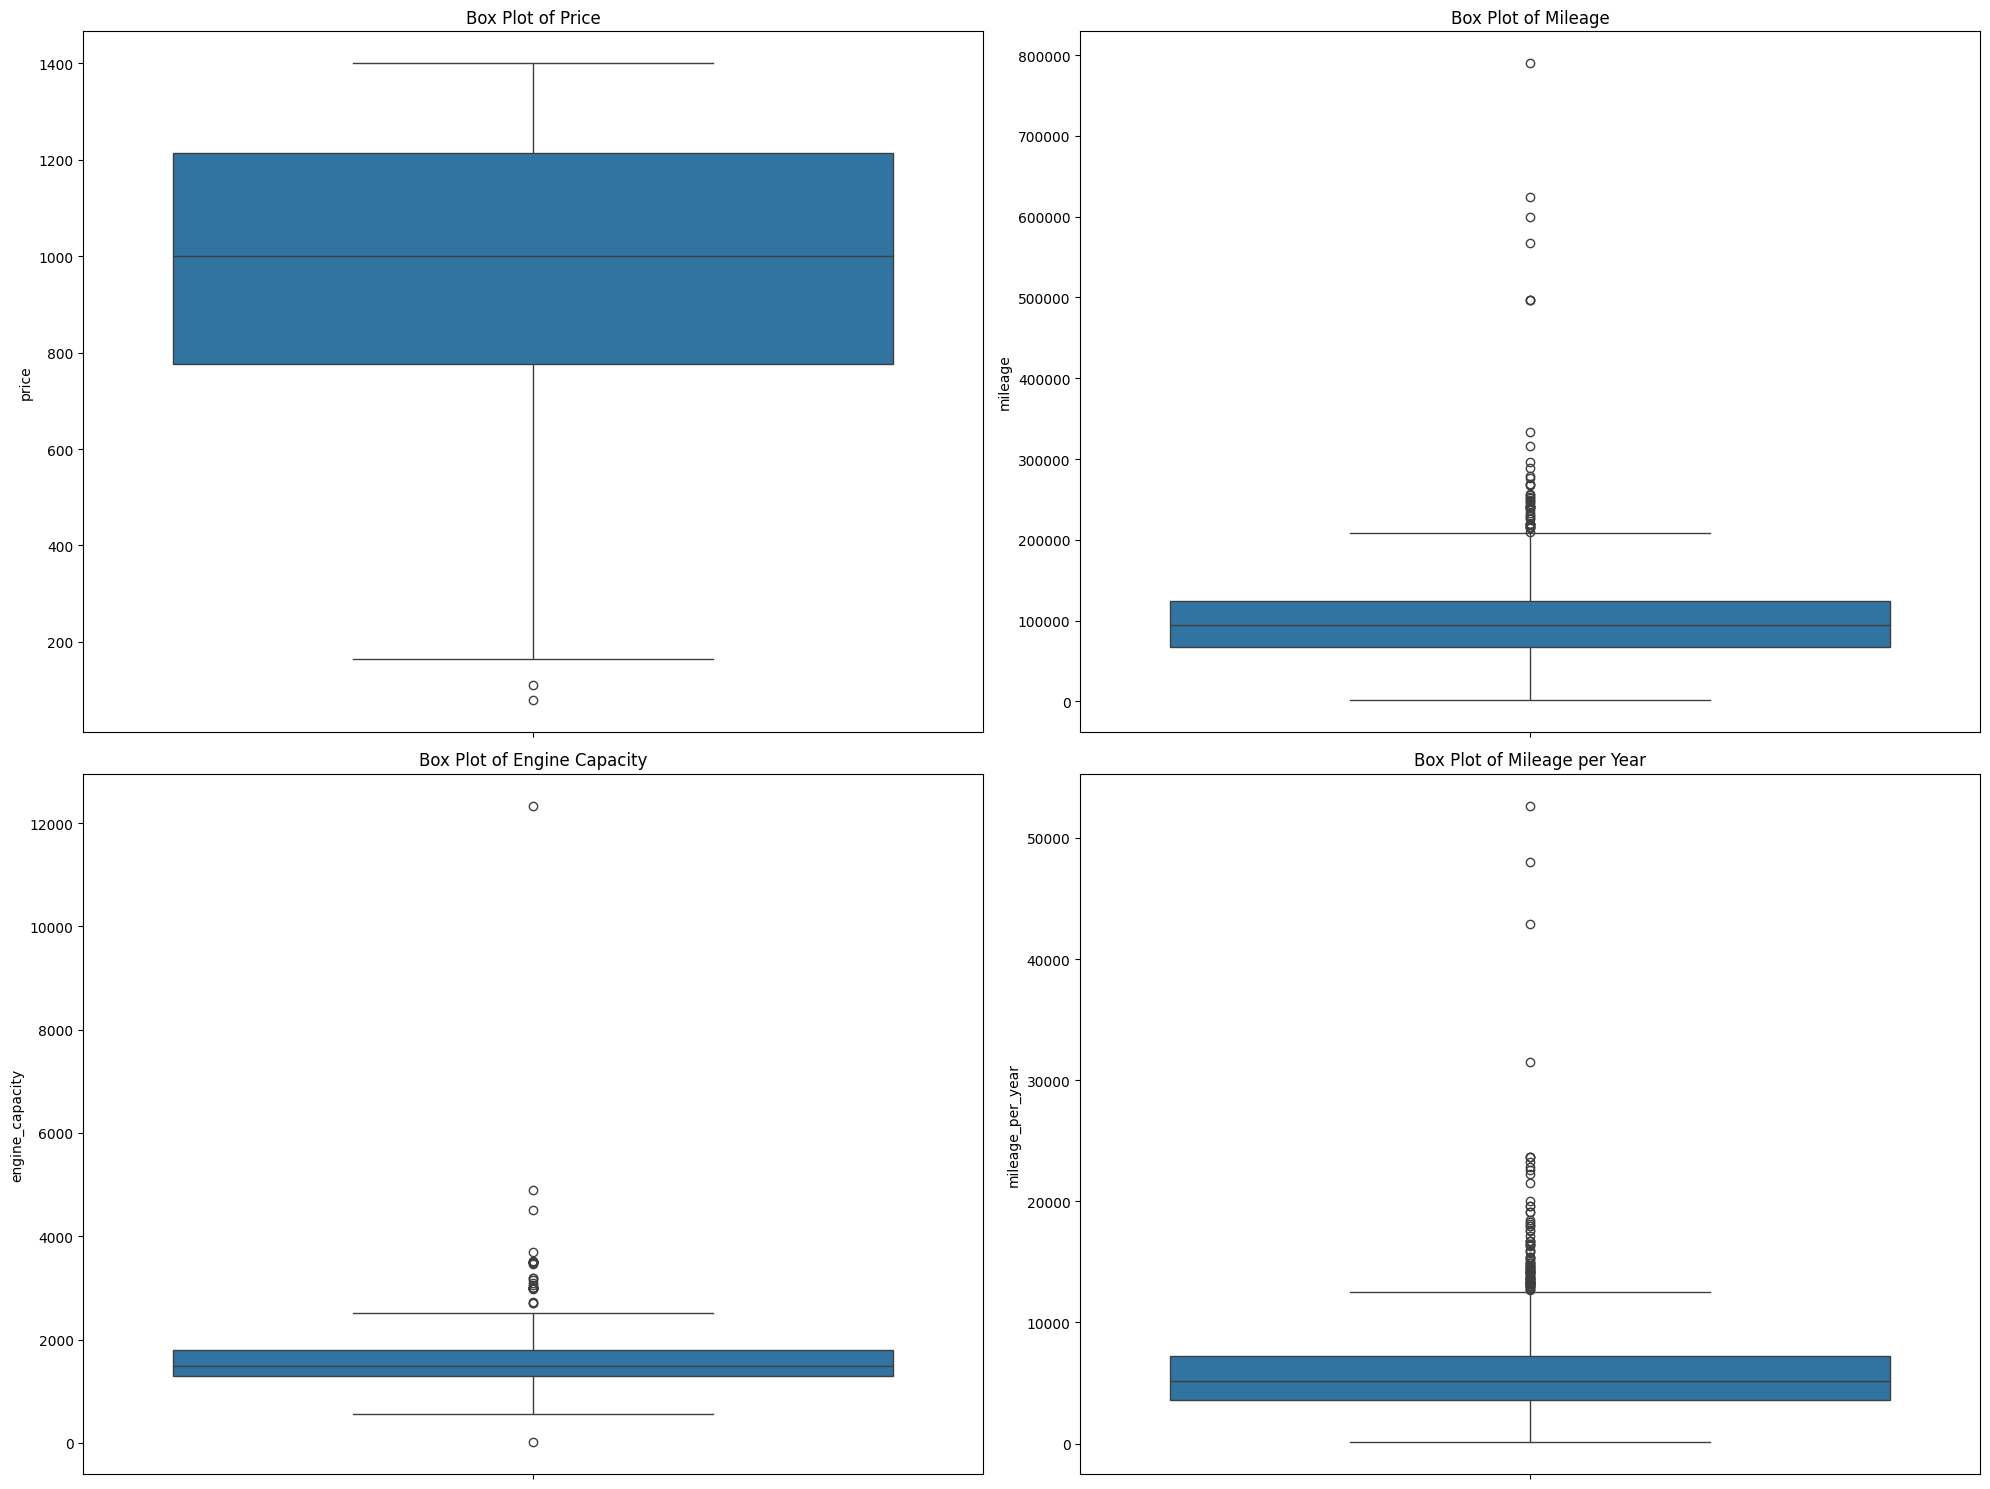

In [ ]:
# Create box plots
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.boxplot(y=df['price'])
plt.title('Box Plot of Price')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['mileage'])
plt.title('Box Plot of Mileage')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['engine_capacity'])
plt.title('Box Plot of Engine Capacity')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['mileage_per_year'])
plt.title('Box Plot of Mileage per Year')

plt.tight_layout()
plt.show()

The box plots show the distribution of the price, mileage, engine capacity, and mileage per year of the cars. There are a few outliers in the data. In particular, the mileage and mileage per year have a few outliers. The outliers are likely due to a few cars being very expensive or having very high mileage. Overall, the data appears to be normally distributed.

# Handling the Outliers

In [ ]:
print("\nHandling Outliers:")

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers in {column}: {len(outliers)}")

    if column == 'price':
        # For price, we'll cap the outliers instead of removing them
        df[column] = np.clip(df[column], lower_bound, upper_bound)
    elif column == 'mileage' or column == 'mileage_per_year':
        # For mileage, we'll remove only extreme outliers (beyond 3 * IQR)
        extreme_lower = Q1 - 3 * IQR
        extreme_upper = Q3 + 3 * IQR
        df = df[(df[column] >= extreme_lower) & (df[column] <= extreme_upper)]
    elif column == 'engine_capacity':
        # For engine capacity, we'll keep all data points
        pass

    return df


# Handle outliers
df_clean = df.copy()
for column in ['price', 'mileage', 'engine_capacity', 'mileage_per_year']:
    df_clean = handle_outliers(df_clean, column)

print(f"\nOriginal dataset shape: {df.shape}")
print(f"Clean dataset shape: {df_clean.shape}")


Handling Outliers:
Number of outliers in price: 2
Number of outliers in mileage: 46
Number of outliers in engine_capacity: 43
Number of outliers in mileage_per_year: 80

Original dataset shape: (2318, 13)
Clean dataset shape: (2298, 13)


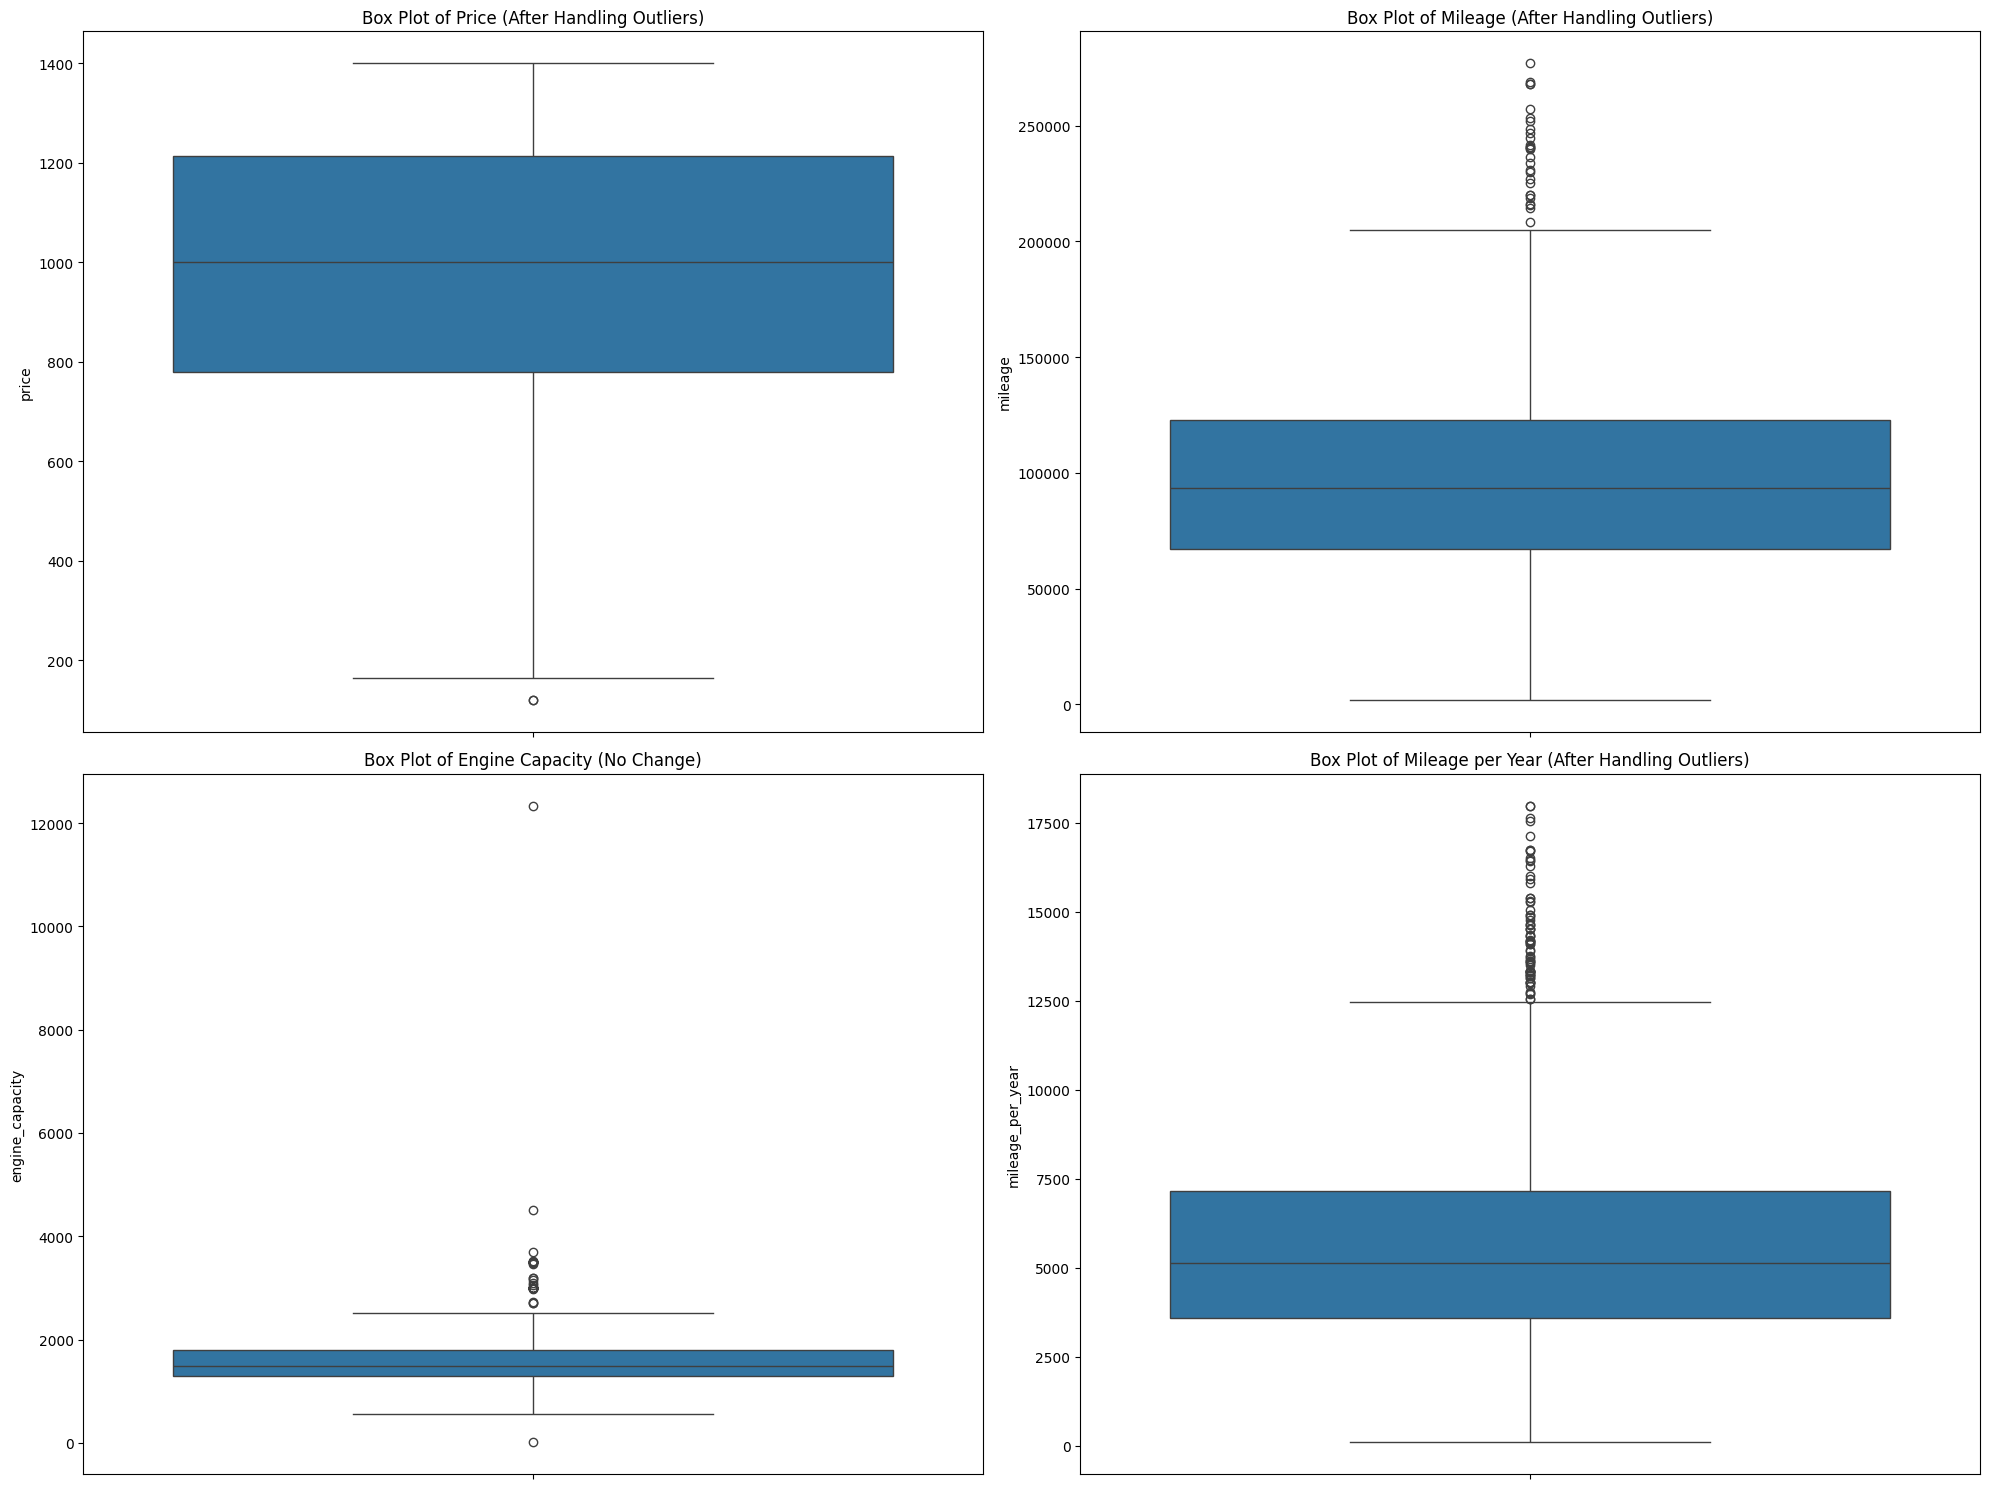

In [ ]:
# Create box plots for clean data
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.boxplot(y=df_clean['price'])
plt.title('Box Plot of Price (After Handling Outliers)')

plt.subplot(2, 2, 2)
sns.boxplot(y=df_clean['mileage'])
plt.title('Box Plot of Mileage (After Handling Outliers)')

plt.subplot(2, 2, 3)
sns.boxplot(y=df_clean['engine_capacity'])
plt.title('Box Plot of Engine Capacity (No Change)')

plt.subplot(2, 2, 4)
sns.boxplot(y=df_clean['mileage_per_year'])
plt.title('Box Plot of Mileage per Year (After Handling Outliers)')

plt.tight_layout()
plt.show()

Insights after Handling Outliers:
1.  Price (After Handling Outliers)

The price is mostly concentrated between 750 and $1250.
There are no outliers after handling them.
The interquartile range (IQR) is relatively small, suggesting a low spread of prices.

2. Mileage (After Handling Outliers)

The mileage is mostly concentrated between 20000 and $30000.
There are a few outliers after handling them.
The IQR is relatively large, suggesting a high spread of mileage.

3. Engine Capacity (No Change)

The engine capacity is mostly concentrated between 2000 and $3000.
There are a few outliers.
The IQR is relatively small, suggesting a low spread of engine capacity.

4.  Mileage per Year (After Handling Outliers)

The mileage per year is mostly concentrated between 5000 and $7500.
There are a few outliers after handling them.
The IQR is relatively small, suggesting a low spread of mileage per year.

5. The cleaned dataset maintains most of the original data while reducing the impact of extreme values
6. This approach balances statistical considerations with the realities of the car market


Listing the columns that has Categorical data type to perform Encoding

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Categorical columns:\n{categorical_columns}")

Categorical columns:
Index(['mark', 'model', 'transmission', 'drive', 'hand_drive', 'fuel'], dtype='object')


In [ ]:
# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['mark', 'model', 'transmission', 'drive', 'hand_drive', 'fuel']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

#View the transformed dataset
df.head()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,car_age,mileage_per_year,high_mileage
0,80,19,143,2003,80000,1240,0,0,2,2,21,3809.523810,0
1,110,19,143,2010,53000,1200,0,0,2,2,14,3785.714286,0
2,165,19,134,2005,47690,2000,0,0,2,2,19,2510.000000,0
3,190,25,29,2008,130661,1990,0,0,2,2,16,8166.312500,1
4,190,4,155,2006,66300,660,0,0,2,2,18,3683.333333,0


All the categorical cols are converted in numerical data type

In [ ]:
# Normalize or standardize numeric features if required
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.drop(columns=['price']))  # Assuming 'price' is the target

Scaling numerical features to a standard range.

#Select a model using multiple algorithms

In [ ]:
# Split features and target
X = df.drop('price', axis=1)  # price is the target variable
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Linear Regression model

In [ ]:
# Initialize and train the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predict on the test set
pred_test_lr = model_lr.predict(X_test)

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_test, pred_test_lr)
rmse_lr = np.sqrt(mse_lr)
r2_score_lr = r2_score(y_test, pred_test_lr)

# Display the results
print('MSE (Linear Regression):', mse_lr)
print('RMSE (Linear Regression):', rmse_lr)
print('R2 Score (Linear Regression):', r2_score_lr)


MSE (Linear Regression): 78499.58312472307
RMSE (Linear Regression): 280.177770575617
R2 Score (Linear Regression): 0.048680643568911


###Lasso model

In [ ]:
# Initialize and train the Lasso model
model_lasso = Lasso(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
model_lasso.fit(X_train, y_train)

# Predict on the test set
pred_test_lasso = model_lasso.predict(X_test)

# Calculate evaluation metrics
mse_lasso = mean_squared_error(y_test, pred_test_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_score_lasso = r2_score(y_test, pred_test_lasso)

# Display the results
print('MSE (Lasso):', mse_lasso)
print('RMSE (Lasso):', rmse_lasso)
print('R2 Score (Lasso):', r2_score_lasso)


MSE (Lasso): 77230.6821861768
RMSE (Lasso): 277.9040881062688
R2 Score (Lasso): 0.06405817776950296


###RandomForestRegressor

In [ ]:
# Initialize and train the RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42, n_estimators=100)
model_rf.fit(X_train, y_train)

# Predict on the test set
pred_test_rf = model_rf.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, pred_test_rf)
rmse_rf = np.sqrt(mse_rf)
r2_score_rf = r2_score(y_test, pred_test_rf)

# Display the results
print('MSE (RandomForestRegressor):', mse_rf)
print('RMSE (RandomForestRegressor):', rmse_rf)
print('R2 Score (RandomForestRegressor):', r2_score_rf)


MSE (RandomForestRegressor): 59462.4546986231
RMSE (RandomForestRegressor): 243.84924584386783
R2 Score (RandomForestRegressor): 0.2793874580731224


###XGBRegressor

In [ ]:
# Initialize and train the XGBRegressor
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100)
model_xgb.fit(X_train, y_train)

# Predict on the test set
pred_test_xgb = model_xgb.predict(X_test)

# Calculate evaluation metrics
mse_xgb = mean_squared_error(y_test, pred_test_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_score_xgb = r2_score(y_test, pred_test_xgb)

# Display the results
print('MSE (XGBRegressor):', mse_xgb)
print('RMSE (XGBRegressor):', rmse_xgb)
print('R2 Score (XGBRegressor):', r2_score_xgb)

MSE (XGBRegressor): 66843.40340839446
RMSE (XGBRegressor): 258.54091244596947
R2 Score (XGBRegressor): 0.1899394392967224


###DecisionTreeRegressor

In [ ]:
# Initialize and train the DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Predict on the test set
pred_test_dt = model_dt.predict(X_test)

# Calculate evaluation metrics
mse_dt = mean_squared_error(y_test, pred_test_dt)
rmse_dt = np.sqrt(mse_dt)
r2_score_dt = r2_score(y_test, pred_test_dt)

# Display the results
print('MSE (DecisionTreeRegressor):', mse_dt)
print('RMSE (DecisionTreeRegressor):', rmse_dt)
print('R2 Score (DecisionTreeRegressor):', r2_score_dt)


MSE (DecisionTreeRegressor): 112291.92887931035
RMSE (DecisionTreeRegressor): 335.09987896045317
R2 Score (DecisionTreeRegressor): -0.3608414371340396


###Mean squared error (mse) for all the Model

In [ ]:
print('The mse value of Linear Regression :  ',        mse_lr)
print('The mse value of Lasso Regression :  ',         mse_lasso)
print('The mse value of Decision Tree Regression :  ', mse_dt)
print('The mse value of Random Forest Regression :  ', mse_rf)
print('The mse value of XGBRegressor :  ',  mse_xgb)

The mse value of Linear Regression :   78499.58312472307
The mse value of Lasso Regression :   77230.6821861768
The mse value of Decision Tree Regression :   112291.92887931035
The mse value of Random Forest Regression :   59462.4546986231
The mse value of XGBRegressor :   66843.40340839446


Lower MSE values indicate a better fit to the data, as they suggest that the model’s predictions are closer to the actual values.

The random forest regressor outperforms the other models with the lowest MSE, making it the best choice among the models tested for this dataset.








### Root Mean squared error (rmse) for all the Model

In [ ]:
print('The rmse value of Linear Regression :  ',        rmse_lr)
print('The rmse value of Lasso Regression :  ',         rmse_lasso)
print('The rmse value of Decision Tree Regression :  ', rmse_dt)
print('The rmse value of Random Forest Regression :  ', rmse_rf)
print('The rmse value of XGBRegressor :  ',  rmse_xgb)

The rmse value of Linear Regression :   280.177770575617
The rmse value of Lasso Regression :   277.9040881062688
The rmse value of Decision Tree Regression :   335.09987896045317
The rmse value of Random Forest Regression :   243.84924584386783
The rmse value of XGBRegressor :   258.54091244596947


Getting root mean squared error(rmse), lesser the rmse value better the model.

The random forest regressor again emerges as the top-performing model, with the lowest RMSE of 243.85. This result supports the MSE analysis and reinforces that random forests provide the best balance of accuracy and generalization for predicting car prices in this dataset.

###R^2 score for all the Model

In [ ]:
print('The r2_score value of Linear Regression :  ',  r2_score_lr)
print('The r2_score value of Lasso Regression :  ',   r2_score_lasso)
print('The r2_score of Decision Tree Regression :  ', r2_score_dt)
print('The r2_score of Random Forest Regression :  ', r2_score_rf)
print('The r2_score of XGBRegressor :  ',  r2_score_xgb)

The r2_score value of Linear Regression :   0.048680643568911
The r2_score value of Lasso Regression :   0.06405817776950296
The r2_score of Decision Tree Regression :   -0.3608414371340396
The r2_score of Random Forest Regression :   0.2793874580731224
The r2_score of XGBRegressor :   0.1899394392967224


An R^2  score close to 1 suggests the model explains a large portion of the variability, while scores closer to 0 suggest that the model captures very little. Negative values indicate that the model performs worse than simply predicting the mean of the target variable.

The random forest regressor once again performs the best, with an R^2  score that indicates it can capture nearly 28% of the variance in the target variable. This model consistently outperforms the others across all metrics (MSE, RMSE, and R^2 ), making it the most reliable choice for predicting car prices with this dataset.

#Hyper tuning for the best / Final Model ( RandomForestRegressor )

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train the final model with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluate on test set
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
cv_r2_mean = cv_scores.mean()

# Display the evaluation metrics
print("\nEvaluation on Test Set:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score on Test Set: {r2:.2f}")
print(f"Mean Cross-Validation R-squared Score: {cv_r2_mean:.2f}")

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.26054085501872476

Evaluation on Test Set:
Mean Squared Error: 59267.84
Root Mean Squared Error: 243.45
R-squared Score on Test Set: 0.28
Mean Cross-Validation R-squared Score: 0.26


The tuned Random Forest Regressor with these parameters achieves the best balance of bias and variance on this dataset. While the R^2  values suggest moderate explanatory power, the low MSE and RMSE show the model’s predictions are reasonably accurate and consistent across validation and test sets. For further improvement, consider additional features or exploring ensemble methods to capture even more variance.

## Save Model with Pickle

In [ ]:
# Save the best model with pickle
with open('best_rf_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf, model_file)

print("Model saved as 'best_rf_model.pkl'")

Model saved as 'best_rf_model.pkl'


#Using the Sample Data with the Model

In [ ]:
# Sample data for prediction
sample_data = {
    'mark': ['Toyota', 'BMW', 'Honda'],
    'model': ['Corolla', 'X5', 'Civic'],
    'year': [2015, 2018, 2016],
    'mileage': [60000, 30000, 50000],
    'engine_capacity': [1.8, 3.0, 2.0],
    'transmission': ['Automatic', 'Automatic', 'Manual'],
    'drive': ['FWD', 'AWD', 'FWD'],
    'hand_drive': ['Left', 'Left', 'Left'],
    'fuel': ['Petrol', 'Diesel', 'Petrol']
}

# Create a DataFrame
sample_df = pd.DataFrame(sample_data)

# Create new features based on the sample data
current_year = 2023
sample_df['car_age'] = current_year - sample_df['year']
sample_df['mileage_per_year'] = sample_df['mileage'] / sample_df['car_age']
sample_df['high_mileage'] = (sample_df['mileage'] > 100000).astype(int)

# Display the sample DataFrame
sample_df.head()

,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,car_age,mileage_per_year,high_mileage
0,Toyota,Corolla,2015,60000,1.8,Automatic,FWD,Left,Petrol,8,7500.000000,0
1,BMW,X5,2018,30000,3.0,Automatic,AWD,Left,Diesel,5,6000.000000,0
2,Honda,Civic,2016,50000,2.0,Manual,FWD,Left,Petrol,7,7142.857143,0


### Preprocessing the sample data same as done for the original data

In [ ]:
# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['mark', 'model', 'transmission', 'drive', 'hand_drive', 'fuel']
for col in categorical_columns:
    sample_df[col] = le.fit_transform(sample_df[col])

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['year', 'mileage', 'engine_capacity', 'car_age', 'mileage_per_year']
sample_df[numerical_columns] = scaler.fit_transform(sample_df[numerical_columns])


# Predict prices using the best_rf model
predicted_prices = best_rf.predict(sample_df)

# Add predicted prices to the sample DataFrame
sample_df['predicted_price'] = predicted_prices

# Display the sample DataFrame with predicted prices
#print(sample_df[['mark', 'model', 'year', 'mileage', 'predicted_price']])
sample_df

,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,car_age,mileage_per_year,high_mileage,predicted_price
0,2,1,-1.069045,1.069045,-0.889001,0,1,0,1,1.069045,0.967620,0,991.810082
1,0,2,1.336306,-1.336306,1.397001,0,0,0,0,-1.336306,-1.376997,0,984.754876
2,1,0,-0.267261,0.267261,-0.508001,1,1,0,1,0.267261,0.409378,0,990.573642
